## Possiveis formatos para expor os datasets

### Dependencias

In [ ]:
pip install datasets python-dotenv sqlalchemy

  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
Using cached python_dotenv-1.1.1-py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from datasets import Dataset

ds = Dataset.from_dict({
    "book": ["As aventuras de Alfredo Godoy", "Lembranças de uma lambida."],
    "category": ["Romance", "Terror"]
})

print(ds[0])


{'book': 'As aventuras de Alfredo Godoy', 'category': 'Romance'}


### Um simples dictionary tem o mesmo efeito que um dataset, mas sem as funcionalidades adicionais.
### que de qualquer forma não são expostas na API.

In [8]:

ds = [
      {
        "book": "As aventuras de Alfredo Godoy",
        "category": "Romance"
      },
      {
        "book": "Lembranças de uma lambida.",
        "category": "Terror"
      }
     ]

print(ds[0])

{'book': 'As aventuras de Alfredo Godoy', 'category': 'Romance'}


## Vamos tentar gerar um dataset a partir da base local.

### Inicializa o sqlalchemy pra ficar mais parecido com o que vamos fazer na API

In [3]:
from sqlalchemy import create_engine
from sqlalchemy.orm import declarative_base
from sqlalchemy.orm import sessionmaker
from dotenv import load_dotenv
import os

# Inicializa variáveis de ambiente
load_dotenv(dotenv_path="../.env")

SQLALCHEMY_DATABASE_URL = os.getenv(
    "DATABASE_URL", "postgresql://localhost/ideal_broccoli"
)

engine = create_engine(SQLALCHEMY_DATABASE_URL)

SessionLocal = sessionmaker(autocommit=False, autoflush=False, bind=engine)

Base = declarative_base()


def get_db():
    db = SessionLocal()
    try:
        yield db
    finally:
        db.close()

In [36]:
from sqlalchemy import text
books = get_db().__next__().execute(text("select b.price,b.rating, c.id from books b inner join categories c on b.category_id = c.id")).all()
books

[(45.17, 2, 51),
 (49.43, 4, 51),
 (48.87, 3, 51),
 (36.94, 2, 51),
 (37.33, 3, 51),
 (44.34, 2, 51),
 (30.54, 1, 51),
 (56.88, 4, 51),
 (23.21, 1, 51),
 (38.95, 3, 51),
 (26.08, 5, 51),
 (47.82, 4, 52),
 (19.63, 1, 52),
 (56.5, 4, 52),
 (16.64, 1, 52),
 (44.1, 4, 52),
 (54.21, 2, 52),
 (13.92, 1, 52),
 (10.69, 1, 52),
 (48.35, 5, 52),
 (16.73, 2, 52),
 (26.8, 3, 52),
 (54.36, 4, 52),
 (35.28, 3, 52),
 (11.84, 1, 52),
 (59.48, 3, 52),
 (27.26, 2, 52),
 (13.71, 3, 52),
 (25.37, 5, 52),
 (52.3, 5, 52),
 (20.89, 4, 52),
 (24.8, 4, 52),
 (38.38, 2, 52),
 (23.05, 5, 52),
 (43.45, 3, 52),
 (19.21, 1, 52),
 (25.4, 3, 52),
 (24.72, 2, 52),
 (57.7, 4, 52),
 (12.29, 5, 52),
 (15.85, 3, 52),
 (20.3, 3, 52),
 (53.98, 1, 52),
 (52.29, 5, 54),
 (16.28, 1, 54),
 (19.49, 4, 54),
 (38.16, 4, 54),
 (51.04, 2, 54),
 (50.4, 3, 54),
 (13.61, 5, 54),
 (18.97, 1, 54),
 (10.16, 3, 54),
 (15.44, 4, 54),
 (48.41, 1, 54),
 (46.91, 2, 54),
 (45.61, 3, 54),
 (53.74, 1, 53),
 (29.69, 3, 53),
 (55.53, 5, 53),
 (36.9

### Agora que consigo pegar os dados, vamos transformar em um dataset
### usando o skikit e o pandas

In [117]:
pip install scikit-learn==1.7.2 pandas==2.3.3 joblib==1.5.2 numpy==2.3.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 58.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carrega os dados do banco de dados para um DataFrame do pandas
# b.title, b.price,b.rating, b.available, c.name 
df_rating = pd.DataFrame(books, columns=["price", "rating", "category"])
X_rating = df_rating.drop('rating', axis=1)
y_rating = df_rating['rating']

df_price = pd.DataFrame(books, columns=["price", "rating", "category"])
X_price = df_price.drop('price', axis=1)
y_price = df_price['price']

# Exemplo de divisão em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_rating, y_rating, test_size=0.3, random_state=42)
X_train


,price,category
541,56.48,64
440,53.51,62
482,41.60,64
422,13.20,62
778,14.44,70
...,...,...
106,51.99,54
270,26.41,62
860,19.73,81
435,27.80,62


### Pegando ali da Aula6 pra ver no que da.

In [126]:
# Tentei usar regressão linear para prever o preço, mas a acurácia ficou baixa
# Certeza que deve ter algo melhor pra fazer isso.
from sklearn.linear_model import LinearRegression
model_price = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_price, y_price, test_size=0.3)
model_price.fit(X_train, y_train)
score_price = model_price.score(X_test, y_test)
print(f"Acuracia de price: {score_price}")

from sklearn.linear_model import LogisticRegression
# Não manjo muito de modelos, mas percebi que não posso usar regressão logistica pra prever preço
# porque é um valor contínuo.
X_train, X_test, y_train, y_test = train_test_split(X_rating, y_rating, test_size=0.3)
model_rating = LogisticRegression(max_iter=1000)
model_rating.fit(X_train, y_train)
score_rating = model_rating.score(X_test, y_test)
print(f"Acuracia do rating: {score_rating}")
# Esse era o erro -> ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Acuracia de price: -0.027225577860454653
Acuracia do rating: 0.21333333333333335


In [127]:
import numpy as np

price = float(29.99)
category = int(1)
features = np.array([[price, category]])
print(f"Array de features {features}")
prediction = model_rating.predict(features)
print(f"Predição de rating para preço 29.99 e categoria 1: {prediction}")


Array de features [[29.99  1.  ]]
Predição de rating para preço 29.99 e categoria 1: [4]


/home/raulg/.pyenv/versions/vercel2/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [128]:
df_rating.describe()

,price,rating,category
count,1000.00000,1000.000000,1000.000000
mean,35.07035,2.923000,65.357000
std,14.44669,1.434967,9.692858
min,10.00000,1.000000,51.000000
25%,22.10750,2.000000,59.000000
50%,35.98000,3.000000,64.000000
75%,47.45750,4.000000,70.000000
max,59.99000,5.000000,100.000000


In [130]:
pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 81.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 77.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


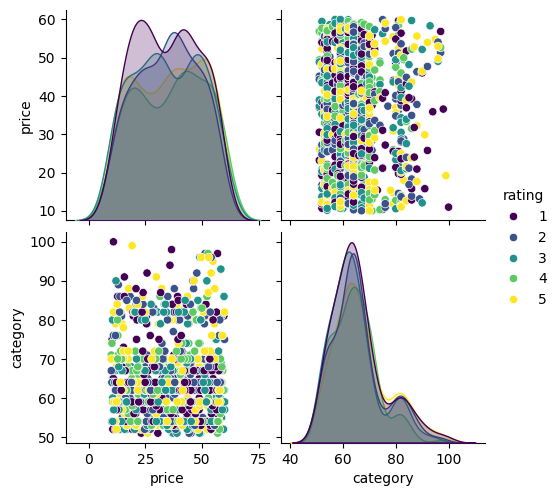

In [139]:
from seaborn import pairplot
import matplotlib.pyplot as plt

pairplot(df_rating, hue="rating", palette="viridis")
plt.show()

### É isso ai, aonde tem mais livros tem mais rating, hehehe.
Não consegui pensar em nada bom pra fazer o predict desse modelo.